# Matematikai Algoritmusok és Felfedezések I.

## 9. Előadás: Matplotlib
### 2021 április 12.

## Adatvizualizáció  

Fontos, hogy az adatokat informatív módon tudjuk prezentálni mások (és persze magunk) számára. 



<img src="https://i.redd.it/cjysv8jznu651.png" alt="Drawing" style="width: 1000px;"/>

![mis](misleading1.jpg)

![mis](misleading2.jpg)

![mis](nomasksgraph.jpg)

![mis](nomasksgraphfunny.jpg)

![mis](Deathsclutter.png)

In [32]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import csv                            # csv fájlból fogunk beolvasni adatokat. 


# Matplotlib
- A legismertebb grafikon és ábra készítő Pythonban. 
- Példákon keresztül nézzük meg a működését.

# New Yorki mókusok
Az adatok egy csv (comma separated values) fájlban vannak, a honlapon megtalálható. Minden sor egy mókus észlelés adatait írja le a Central Parkban. Az első sorból látszik, hogy milyen adatok vannak megadva észlelésenként: 

long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,
combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,running,
chasing,climbing,eating,foraging,other_activities,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,
other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts

Először készítünk egy függvényt, ami beolvas egy oszlopot:

In [3]:
def getcolumn(fajlnev, ind):      # egy oszlop beolvasása egy cvs fájlból, de legfeljebb 3000 elem. 
    ans=[]
    c=0
    with open(fajlnev, newline='') as csvfile:
        sqreader = csv.reader(csvfile, delimiter=',', quotechar='"')
        ans=[next(sqreader)[ind] for _ in range(3000)]
        del ans[0]
        return ans
    return ans 

In [34]:
getcolumn('nyc_squirrels.csv',7)[0:10] # első 10 mókus kora

['NA',
 'Adult',
 'Adult',
 'Juvenile',
 'NA',
 'Juvenile',
 'Adult',
 'NA',
 'Adult',
 'Adult']

In [35]:
a=getcolumn('nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)           # A tömbben előforduló egyedei objektumok és hogy hányszor 
                                                              # fordulnak elő

In [36]:
print(unique)
print(counts)

['?' 'Adult' 'Juvenile' 'NA']
[   4 2550  327  118]


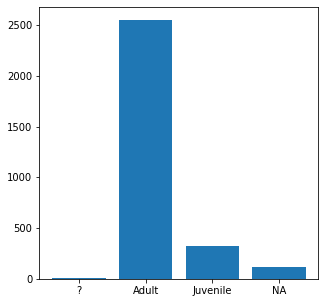

In [10]:
a=getcolumn('nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True) 

fig, axs = plt.subplots(1, 1, figsize=(5, 5))   # méret és grafikonok száma
axs.bar(unique,counts)
plt.show()


<img src="https://matplotlib.org/_images/anatomy.png" alt="Drawing" style="width: 850px;"/>

### Több grafikon egymás mellett
A matplotlibet kétféle stílusban lehet használni. Mi az objektum orientált stílust fogjuk követni, ez az ajánlott. 

Egy képen belül több grafikon van, amit `axes`-nek hívunk. (Nem összekeverendő az `axis` szóval, ami tengelyt jelent!) Amelyikre kiadjuk a parancsot, arra rajzolunk. 

(A másik stílus az volna, hogy mindig plt.parancs formában adjuk ki a rajzoló parancsokat és egy külön parancsal állítjuk be, hogy éppen melyik grafikonra rajzolunk)

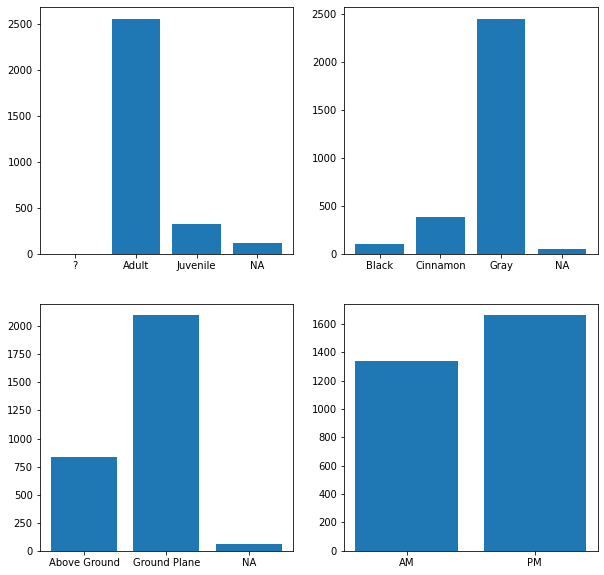

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

a=getcolumn('nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[0, 0].bar(unique,counts)

a=getcolumn('nyc_squirrels.csv',8)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[0, 1].bar(unique,counts)

a=getcolumn('nyc_squirrels.csv',12)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[1, 0].bar(unique,counts)

a=getcolumn('nyc_squirrels.csv',4)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[1, 1].bar(unique,counts)


plt.show()

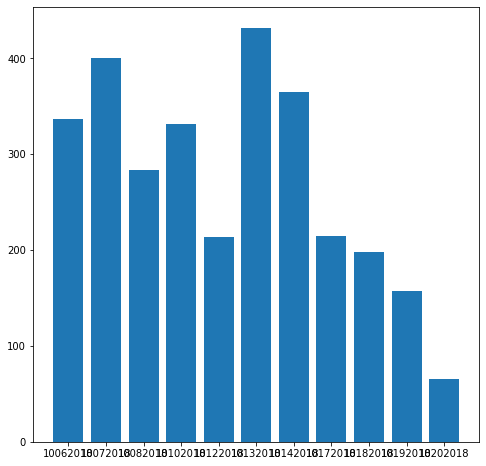

In [39]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.bar(unique,counts)
plt.show()

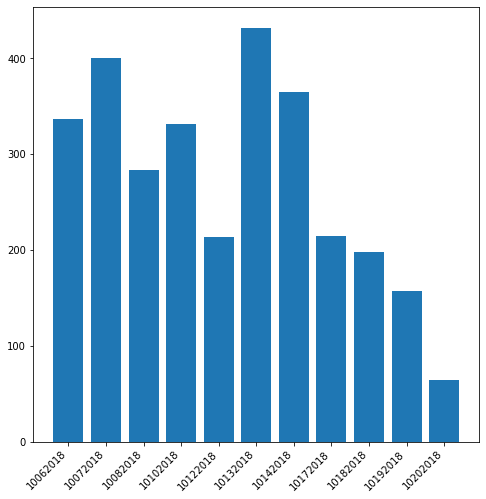

In [40]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

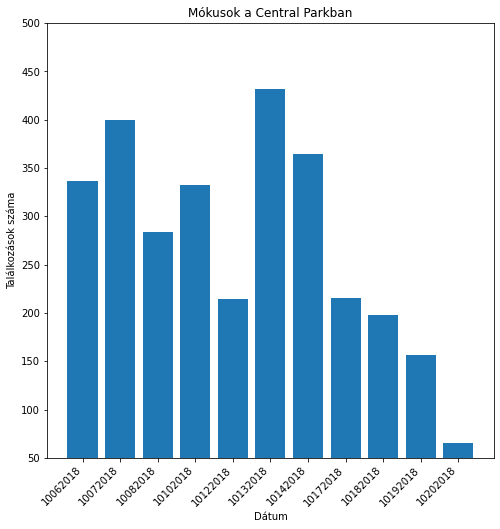

In [41]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Találkozások száma', xlabel='Dátum',title='Mókusok a Central Parkban')
plt.show()

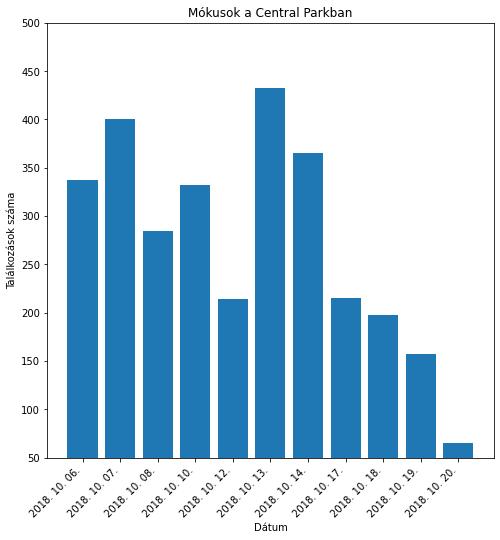

In [15]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Találkozások száma', xlabel='Dátum',
       title='Mókusok a Central Parkban')
plt.show()

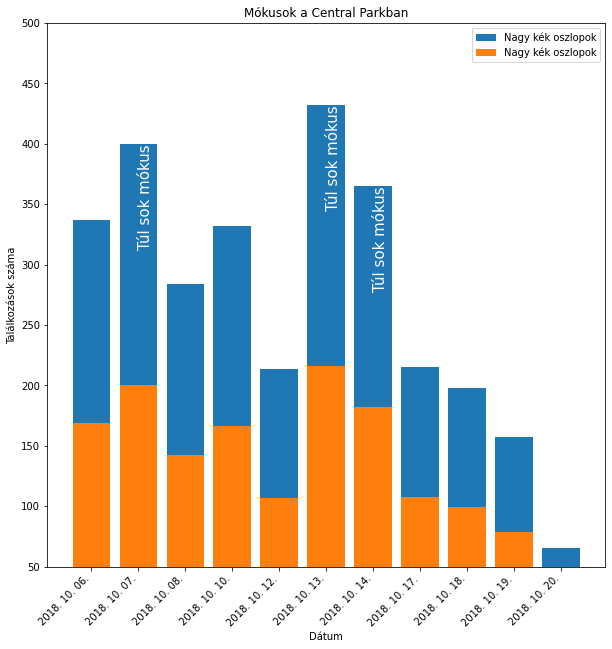

In [43]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.bar(unique,counts,label="Nagy kék oszlopok")
axs.bar(unique,[x/2 for x in counts],label="Nagy kék oszlopok")
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Találkozások száma', xlabel='Dátum',
       title='Mókusok a Central Parkban')

for group in [1,6,5]:
    axs.text( group, counts[group], "Túl sok mókus", fontsize=15,
            verticalalignment="top", rotation=90,color="white")
axs.legend()
plt.show()



# Kördiagram

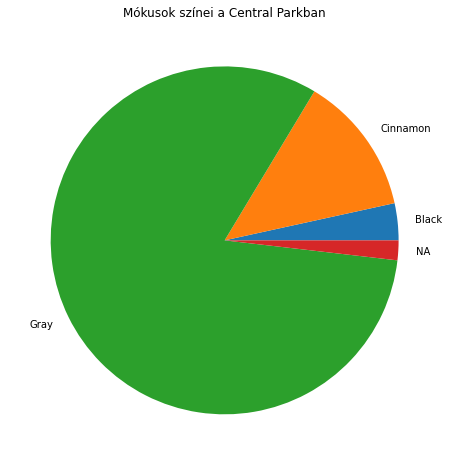

In [44]:
a=getcolumn('nyc_squirrels.csv',8)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.pie(counts,labels=unique)
axs.set(title='Mókusok színei a Central Parkban')
plt.show()



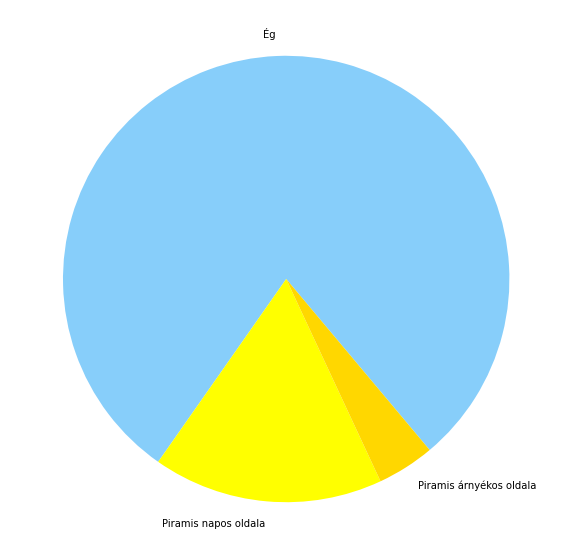

In [47]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.axis('equal')
langs = ['Ég', 'Piramis napos oldala', 'Piramis árnyékos oldala']
nums = [285/360,60/360,15/360]
colors=["lightskyblue","yellow","gold"]
ax.pie(nums, labels = langs, colors=colors,startangle=-50)
plt.show()

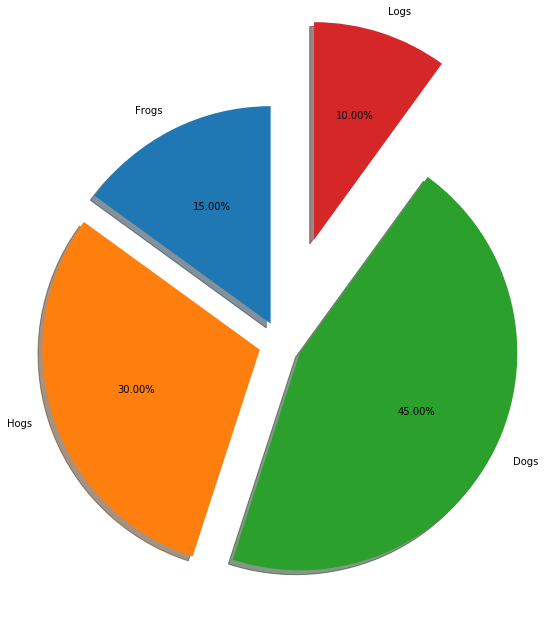

In [28]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0.1, 0.1, 0.1, 0.5)  # melyik mennyire jöjjön ki

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.show()

## Függvény

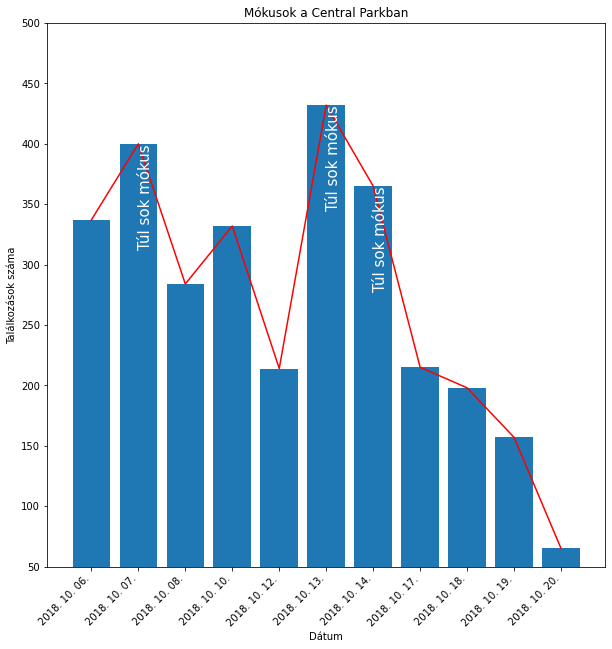

In [18]:
a=getcolumn('nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Találkozások száma', xlabel='Dátum',
       title='Mókusok a Central Parkban')

for group in [1,6,5]:
    axs.text( group, counts[group], "Túl sok mókus", fontsize=15,
            verticalalignment="top", rotation=90,color="white")
axs.plot(counts,color="red")
plt.show()

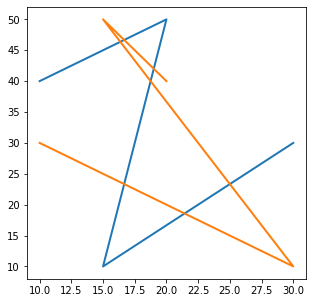

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

plt.plot([10,20,15,30], [40,50,10,30], lw=2)
plt.plot([20,15,30,10], [40,50,10,30], lw=2)

plt.show()

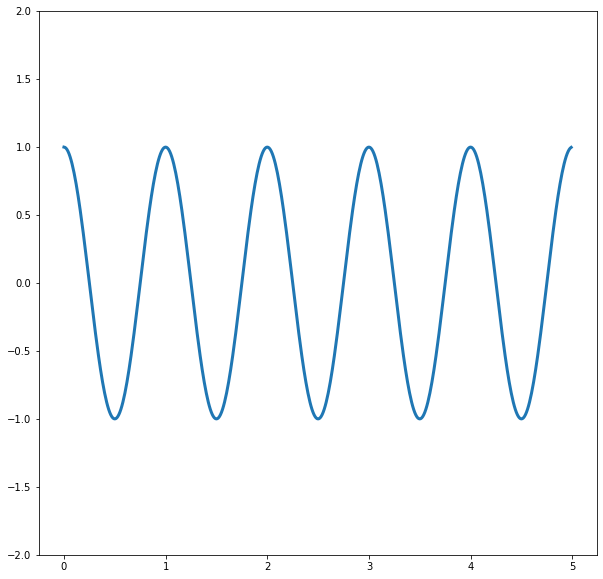

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
plt.plot(t, s, lw=3)
plt.ylim(-2, 2)
plt.show() 

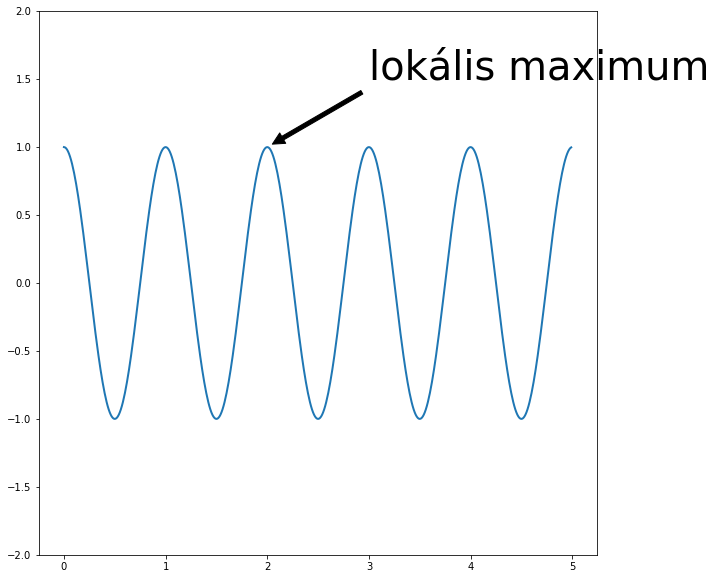

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
 
axs.annotate('lokális maximum', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05), size=40
             )
plt.ylim(-2, 2)
plt.show()

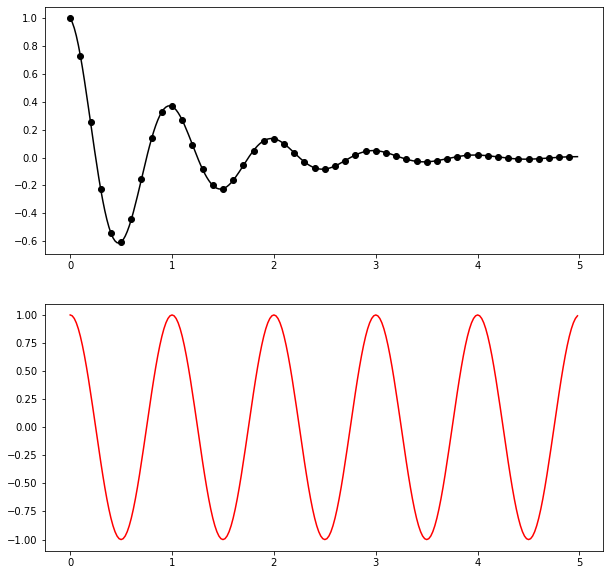

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(t1, f(t1), 'ko')
axs[0].plot( t2, f(t2), 'k')
axs[1].plot(t2, np.cos(2*np.pi*t2), 'r-')
plt.show()

## Scatter plot
Pontokat rajzol, x-koordináta és y-koordináta tömb alapján. 

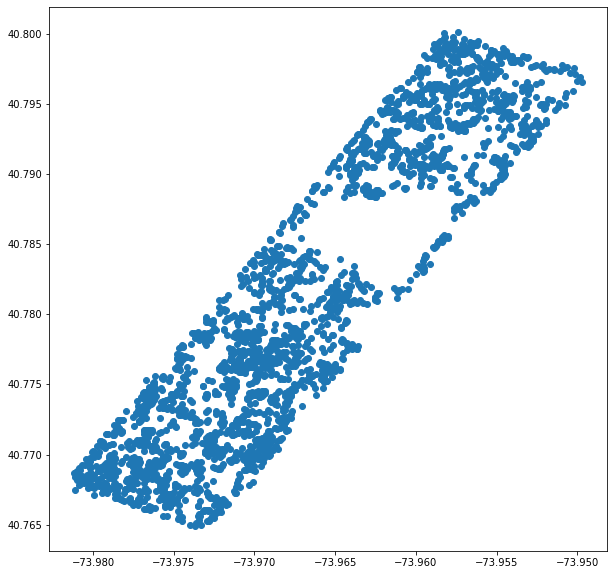

In [21]:
xpos=getcolumn('nyc_squirrels.csv',0)
ypos=getcolumn('nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(xpos,ypos)
plt.show()

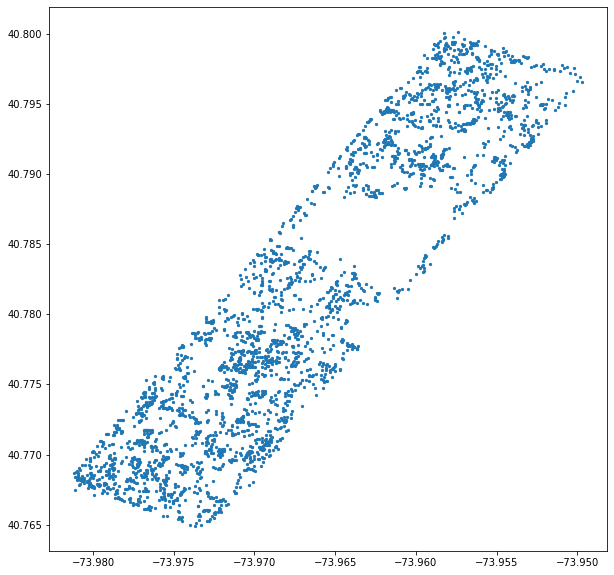

In [22]:
xpos=getcolumn('nyc_squirrels.csv',0)
ypos=getcolumn('nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

fig, axs = plt.subplots(1, 1, figsize=(10, 10)) 
axs.scatter(xpos,ypos,s=5)
plt.show()

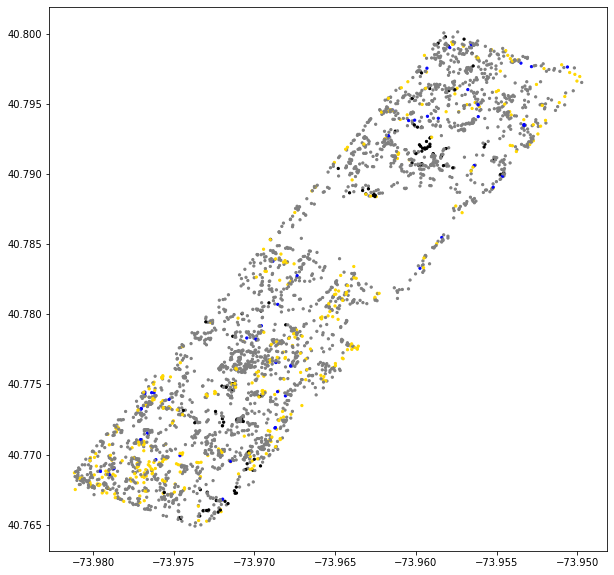

In [23]:
xpos=getcolumn('nyc_squirrels.csv',0)
ypos=getcolumn('nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

col=getcolumn('nyc_squirrels.csv',8)
def colorpicker(c):
    if c=='Gray': return "gray"
    if c=='Cinnamon': return "gold"
    if c=='Black': return "black"
    return 'blue'
    
colors=[colorpicker(a) for a in col]

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
axs.scatter(xpos,ypos,s=5,c=colors)
plt.show()

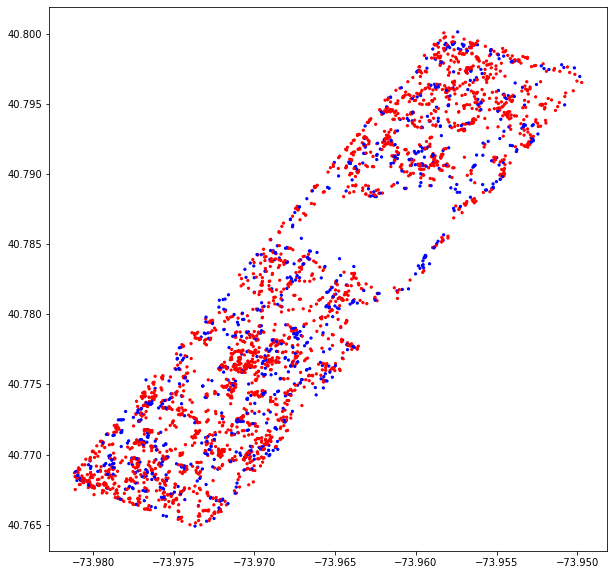

In [48]:
xpos=getcolumn('nyc_squirrels.csv',0)
ypos=getcolumn('nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

col=getcolumn('nyc_squirrels.csv',12)
def colorpicker(c):
    if c=='Above Ground': return "blue"
    return 'red'
    
colors=[colorpicker(a) for a in col]

fig, axs = plt.subplots(1, 1, figsize=(10, 10)) 
axs.scatter(xpos,ypos,s=5,c=colors)
plt.show()

## Kitérő: Térkép


In [25]:
import folium      # egy a sok térképmegjelenítő közül

In [49]:
xpos=getcolumn('nyc_squirrels.csv',0)
ypos=getcolumn('nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

coords=list(zip(ypos,xpos))

#New York koordinátái
NYC_COORD = [40.7828, -73.970]

# Térkép létrehozása
map_nyc = folium.Map(location=NYC_COORD, zoom_start=13,  width=1000, height=800)

# Pontok kirajzolása comprehension segítségével
[folium.CircleMarker(coords[i], radius=1,
                color='#0080bb', fill_color='#0080bb').add_to(map_nyc) 
for i in range(len(coords))]

# Térkép megjelenítés
map_nyc



## Hisztogram

A `party.csv` New Yorki csendháborítások adatait tartalmazza. 

In [52]:
hour=getcolumn('party.csv',0)


In [53]:
hour[0:10]

['2015-12-31 00:01:15',
 '2015-12-31 00:02:48',
 '2015-12-31 00:03:25',
 '2015-12-31 00:03:26',
 '2015-12-31 00:05:10',
 '2015-12-31 00:08:05',
 '2015-12-31 00:11:40',
 '2015-12-31 00:12:13',
 '2015-12-31 00:12:37',
 '2015-12-31 00:14:13']

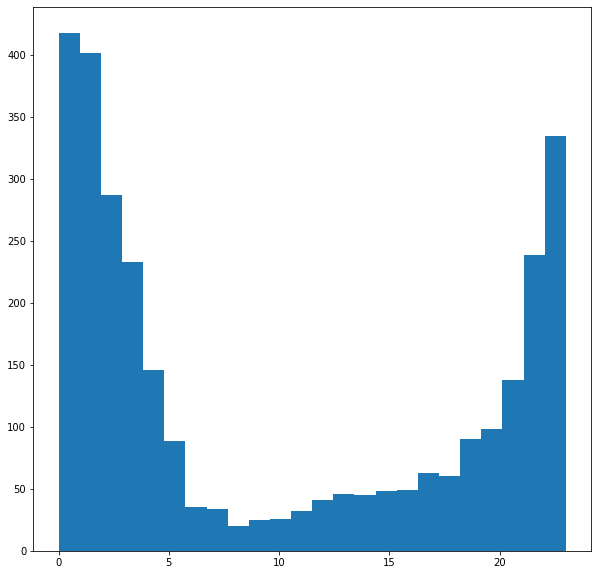

In [54]:
hour=getcolumn('party.csv',0)
hour=[ int(row[11])*10+int(row[12]) for row in hour]
fig, axs = plt.subplots(1, 1, figsize=(10,10))
plt.hist(hour,bins=24)
plt.show()

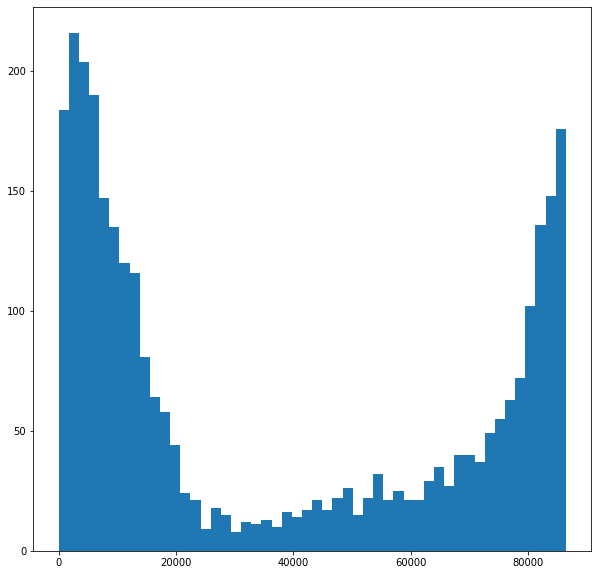

In [56]:
hour=getcolumn('party.csv',0)
hour=[ (int(row[11])*10+int(row[12]))*3600+(int(row[14])*10+int(row[15]))*60+int(row[17])*10+int(row[18]) for row in hour]
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.hist(hour,bins=50)
plt.show()

In [57]:
xpos=getcolumn('party.csv',6)
ypos=getcolumn('party.csv',7)

xpos=np.array([float(a) for a in xpos if len(a)>0])
ypos=np.array([float(a) for a in ypos if len(a)>0])

NYC_COORD = [40.7128, -74.0059]

coords=list(zip(xpos,ypos))

map_nyc = folium.Map(location=NYC_COORD, zoom_start=12, 
 width=1000, height=800)

[folium.CircleMarker(coords[i], radius=1,
                color='#0080bb', fill_color='#0080bb').add_to(map_nyc) 
for i in range(len(coords))]

map_nyc

## Kép rajzolás tömb alapján

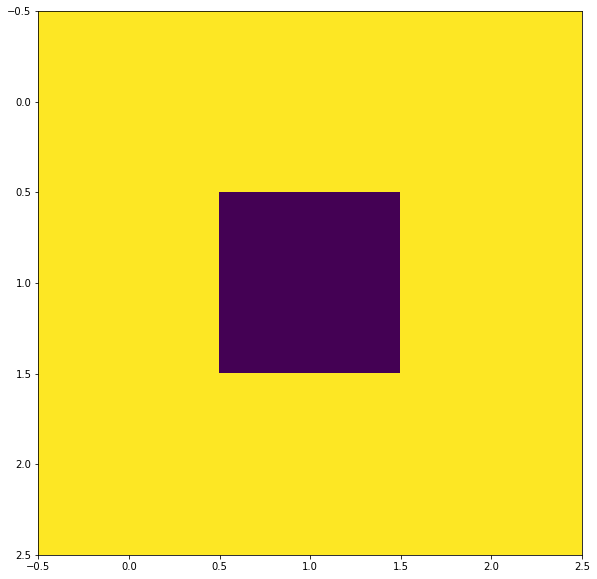

In [30]:
# labirintus rajzoló feltúrbózva. 
def printmaze(image):
    fig = plt.figure(figsize = (10,10))  
    ax = fig.add_subplot(111)
    ax.imshow(image)
    plt.show()
printmaze(np.array([[1,1,1],[1,0,1],[1,1,1]]))                

In [58]:
#Labirintus
def makemaze(w=16,h=8):
    maze=np.ones((2*w+1,2*h+1))
    vis=np.zeros((2*w+1,2*h+1))
 
    def walk(x, y):
        vis[x][y] = 1
        maze[x,y]=0
          
        d = [(x - 2, y), (x, y + 2), (x + 2, y), (x, y - 2)]
        rn.shuffle(d)
        
        for (xx, yy) in d:
            if (not xx in range(2*w+1)) or (not yy in range(2*h+1)) or vis[xx][yy]: 
                continue
            if xx == x: 
                maze[x][max(y, yy)-1] = 0
            if yy == y: 
                maze[max(x, xx)-1][y] = 0
            walk(xx, yy)
 
    walk(2*rn.randrange(w)+1, 2*rn.randrange(h)+1)
 
    return maze


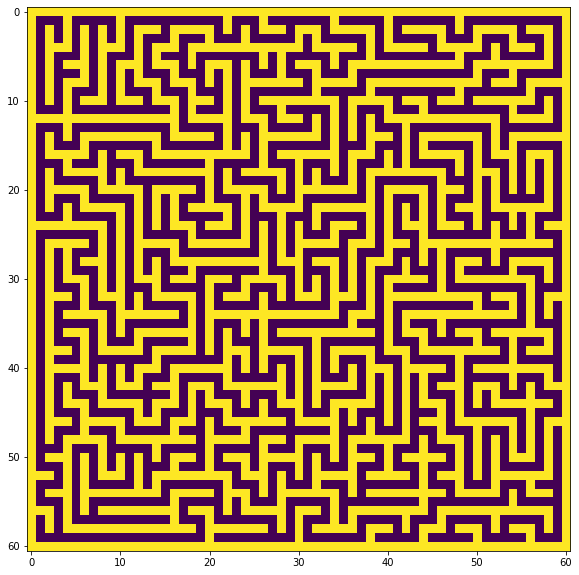

In [50]:
printmaze(makemaze(30,30))

### Mentés képként
`plt.savefig("nev.png")`

# Példák

### További példák: https://matplotlib.org/gallery/index.html

In [52]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y


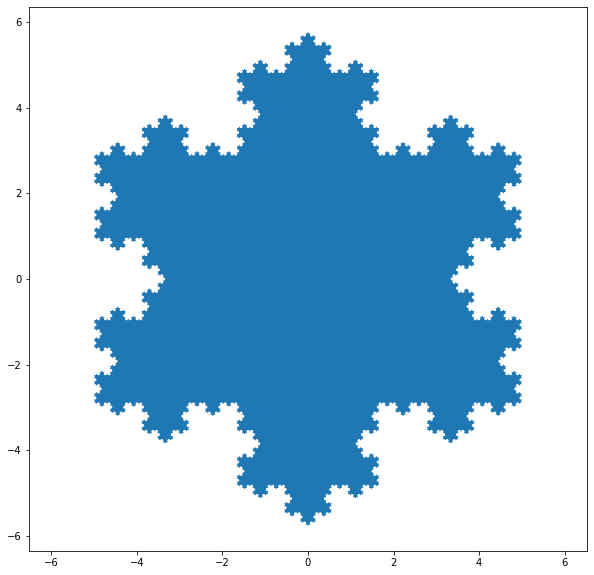

In [53]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.fill(x, y)
plt.show()

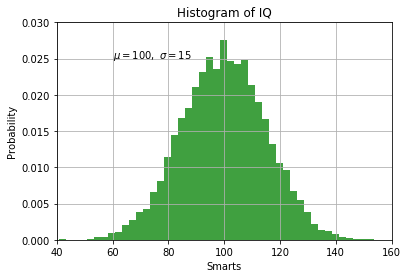

In [54]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

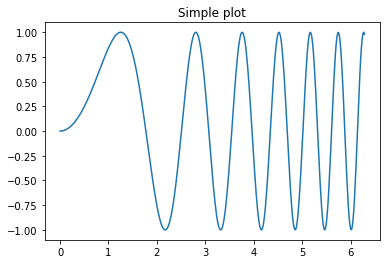

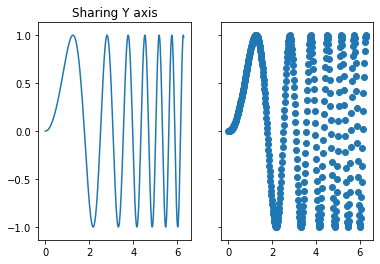

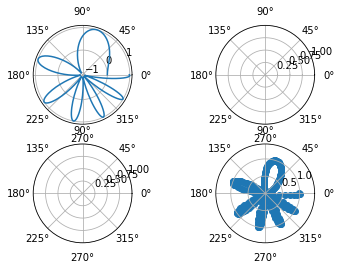

In [55]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)




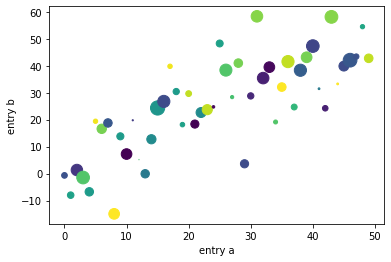

In [56]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

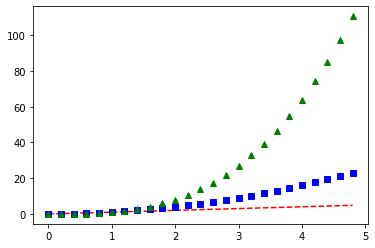

In [58]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()